In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import vv

In [4]:
df_list = pd.read_csv(vv.LISTING_BASIC_FILE)
df_list.head(5)

,ids,Links,Address,Description,Price,version,borough,referencing_link,add_info,date_scraped
0,123171899,https://www.rightmove.co.uk/properties/1231718...,"Springbank, London",3 bedroom apartment for sale,475000.0,v0021_220622,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 09/05/2022 by haart, Southgate",2022-06-26 20:35:34
1,85461000,https://www.rightmove.co.uk/properties/8546100...,"Bullsmoor Way, Waltham Cross, EN8",3 bedroom terraced house for sale,375000.0,v0021_220622,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Reduced on 17/03/2022 by Christopher Stokes, C...",2022-06-26 20:35:34
2,85174740,https://www.rightmove.co.uk/properties/8517474...,"Jervis Avenue, Enfield",2 bedroom semi-detached house for sale,375000.0,v0021_220622,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 25/02/2022 by Cottage Fields, Enfield",2022-06-26 20:35:34
3,124007903,https://www.rightmove.co.uk/properties/1240079...,"Leigh Hunt Drive, London",2 bedroom apartment for sale,375000.0,v0021_220622,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 17/06/2022 by haart, Southgate",2022-06-26 20:35:35
4,85614570,https://www.rightmove.co.uk/properties/8561457...,"Grovelands Road, Palmers Green, London, N13",1 bedroom flat for sale,375000.0,v0021_220622,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,Added on 11/06/2022 by Anthony Pepe Estate Age...,2022-06-26 20:35:35


In [6]:
df_indiv = pd.read_csv(vv.LISTING_ENRICHED_FILE)
df_indiv = df_indiv.rename(index=str, columns={"Station_Prox": "closeness_to_station",'bedrooms_model':'bedrooms','bathrooms_model':'bathrooms','tenure.tenureType':'tenureType'})
df_indiv.head(5)

,ids,version,link,closeness_to_station,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description,date_scraped
0,123510599.0,v0001_130622,--,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01 01:00:00
1,85572123.0,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01 01:00:00
2,85701084.0,v0001_130622,--,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01 01:00:00
3,80180424.0,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01 01:00:00
4,96572116.0,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01 01:00:00


In [10]:
df_json = pd.read_csv(vv.LISTING_JSONMODEL_FILE)
df_json['id'] = df_json['id'].astype(int)
df_json.head(5)

/tmp/ipykernel_37610/4031172973.py:1: DtypeWarning: Columns (23,25,26,28,31,32,40,44,47,51,54,56,59,60,61,62,63,64,74,78,79,80,82,83,84,85,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json = pd.read_csv(vv.LISTING_JSONMODEL_FILE)


,id,keyFeatures,images,floorplans,virtualTours,industryAffiliations,rooms,nearestAirports,nearestStations,showSchoolInfo,...,sharedOwnership.rentPrice,sharedOwnership.rentFrequency,livingCosts.councilTaxExempt,livingCosts.councilTaxIncluded,livingCosts.annualGroundRent,livingCosts.groundRentReviewPeriodInYears,livingCosts.groundRentPercentageIncrease,livingCosts.annualServiceCharge,livingCosts.councilTaxBand,livingCosts.domesticRates
0,124126712,['QUIET AREA SURROUNDED BY ELMSTEAD &amp; MARV...,[{'url': 'https://media.rightmove.co.uk/18k/17...,[{'url': 'https://media.rightmove.co.uk/18k/17...,[],[{'name': 'Association of Residential Letting ...,[],[],"[{'name': 'Elmstead Woods Station', 'types': [...",True,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,122078540,"['Why Should You Buy Me?', 'Limited to Buyers ...",[{'url': 'https://media.rightmove.co.uk/246k/2...,[{'url': 'https://media.rightmove.co.uk/246k/2...,[{'url': 'https://my.matterport.com/show/?m=Qr...,[{'name': 'Association of Residential Letting ...,[],[],"[{'name': 'Ravensbourne Station', 'types': ['N...",True,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,123967277,"['Three bedrooms', 'Open plan kitchen diner', ...",[{'url': 'https://media.rightmove.co.uk/56k/55...,[{'url': 'https://media.rightmove.co.uk/56k/55...,[{'url': 'https://nichecom.s3.eu-west-1.amazon...,[{'name': 'Ombudsman for REsale Estate Agents ...,[],[],"[{'name': 'Hayes Station', 'types': ['NATIONAL...",True,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,123772928,"['Detached Family House', 'Three Double Bedroo...",[{'url': 'https://media.rightmove.co.uk/10k/92...,[{'url': 'https://media.rightmove.co.uk/10k/92...,[],[{'name': 'Association of Residential Letting ...,"[{'name': 'Ground Floor', 'description': None,...",[],"[{'name': 'Hayes Station', 'types': ['NATIONAL...",True,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,85455351,"['Victorian mid terrace house', 'Conveniently ...",[{'url': 'https://media.rightmove.co.uk/5k/431...,[{'url': 'https://media.rightmove.co.uk/5k/431...,[{'url': 'https://property-teaser-video.s3.eu-...,[{'name': 'Association of Residential Letting ...,[],[],"[{'name': 'Orpington Station', 'types': ['NATI...",True,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_meta = pd.read_csv(vv.LISTING_JSON_META_FILE)
df_meta['id_copy'] = df_meta['id_copy'].astype(int)
df_meta.head(5)

,id_copy,version,date_scraped,analyticsBranch.agentType,analyticsBranch.branchId,analyticsBranch.branchName,analyticsBranch.branchPostcode,analyticsBranch.brandName,analyticsBranch.companyName,analyticsBranch.companyTradingName,...,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.selectedCurrency,analyticsProperty.selectedPrice,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,analyticsProperty.customUri,Unnamed: 46
0,123772928,v0021_220622,2022-06-22 13:41:30,ea_dual,9274,Petts Wood,NaN,Proctors,Proctors,NaN,...,Detached,Houses,False,NaN,NaN,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN
1,85455351,v0021_220622,2022-06-22 13:42:34,ea_sales,4316,Petts Wood,NaN,jdm,jdm,NaN,...,Terraced,Houses,False,NaN,NaN,True,External Link,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN
2,85566933,v0021_220622,2022-06-22 13:42:43,ea_dual,50710,Crystal Palace,NaN,Acorn,Acorn Group,Acorn Group,...,Flat,Flats / Apartments,False,NaN,NaN,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN
3,118650851,v0021_220622,2022-06-22 13:42:48,ea_sales,17465,Mottingham- Sales,NaN,Cockburn Estate Agents,Cockburn,NaN,...,Maisonette,Flats / Apartments,False,NaN,NaN,True,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN
4,120326048,v0021_220622,2022-06-22 13:42:54,ea_dual,50710,Crystal Palace,NaN,Acorn,Acorn Group,Acorn Group,...,Flat,Flats / Apartments,False,NaN,NaN,True,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN


In [16]:
JOIN_HOW = 'left'

df_original = df_list \
    .merge(df_indiv, on='ids', how='inner', suffixes=('_indiv', '_listing')) \
    .merge(df_json, left_on='ids', right_on='id', how=JOIN_HOW, suffixes=('_comb2', '_model')) \
    .merge(df_meta, left_on='ids', right_on='id_copy', how=JOIN_HOW, suffixes=('comb3', '_meta'))
#combined_df

df_original.set_index("ids", inplace=True)
df_original = df_original[~df_original.index.duplicated(keep='last')]
df_original.shape

(10375, 160)

In [17]:
df_original = df_original.drop(['Links','version_listing','version_indiv','link'], axis=1)

In [24]:
#df_original['Target'] = df_original['Price'].fillna(0.0)
df_original['Price'] = pd.to_numeric(df_original['Price'], 'coerce').dropna().astype(int)
print(df_original.shape)
df_original.info()

(10375, 156)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10375 entries, 123171899 to 97494416
Columns: 156 entries, Address to Unnamed: 46
dtypes: float64(28), object(128)
memory usage: 12.4+ MB


In [27]:
df_original.iloc[:,0:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10375 entries, 123171899 to 97494416
Data columns (total 100 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Address                                             10375 non-null  object 
 1   Description                                         10375 non-null  object 
 2   Price                                               10353 non-null  float64
 3   borough                                             10350 non-null  object 
 4   referencing_link                                    7794 non-null   object 
 5   add_info                                            7794 non-null   object 
 6   date_scraped_indiv                                  7794 non-null   object 
 7   closeness_to_station                                10375 non-null  float64
 8   type                                                10334 non-nu

In [26]:
df_original.iloc[:,100:200].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10375 entries, 123171899 to 97494416
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sharedOwnership.rentFrequency              6724 non-null   object 
 1   livingCosts.councilTaxExempt               8001 non-null   object 
 2   livingCosts.councilTaxIncluded             8004 non-null   object 
 3   livingCosts.annualGroundRent               23 non-null     object 
 4   livingCosts.groundRentReviewPeriodInYears  4 non-null      object 
 5   livingCosts.groundRentPercentageIncrease   1 non-null      object 
 6   livingCosts.annualServiceCharge            19 non-null     float64
 7   livingCosts.councilTaxBand                 99 non-null     object 
 8   livingCosts.domesticRates                  0 non-null      float64
 9   id_copy                                    7990 non-null   float64
 10  version_met

In [29]:
print(df_original.shape)
df_original = df_original[df_original["Price"] != 'POA']
df_original.shape

(10375, 156)


(10375, 156)

In [30]:
df_original['postcode'] = df_original["Address"].str.extract("([A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}|[A-Z]{1,2}\d[A-Z\d]?)")
df_original['compass'] = df_original["postcode"].str[0:2]
df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette)")
df_original['sq_ft'] = df_original["size"].str.extract("(\d*) sq. ft.")
df_original['hold_type2'] = df_original["hold_type"].str.replace("Tenure:","").str.strip()

df_original

,Address,Description,Price,borough,referencing_link,add_info,date_scraped_indiv,closeness_to_station,type,bedrooms_comb2,...,analyticsProperty.selectedPrice,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,analyticsProperty.customUri,Unnamed: 46,postcode,compass,sq_ft,hold_type2
ids,,,,,,,,,,,,,,,,,,,,,
123171899,"Springbank, London",3 bedroom apartment for sale,475000.0,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 09/05/2022 by haart, Southgate",2022-06-26 20:35:34,0.6,apartment,3.0,...,NaN,False,Embedded,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NaN,NaN,NaN,NaN
85461000,"Bullsmoor Way, Waltham Cross, EN8",3 bedroom terraced house for sale,375000.0,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Reduced on 17/03/2022 by Christopher Stokes, C...",2022-06-26 20:35:34,0.6,house,3.0,...,NaN,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,EN8,EN,NaN,NaN
85174740,"Jervis Avenue, Enfield",2 bedroom semi-detached house for sale,375000.0,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 25/02/2022 by Cottage Fields, Enfield",2022-06-26 20:35:34,0.4,house,2.0,...,NaN,True,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NaN,NaN,NaN,NaN
124007903,"Leigh Hunt Drive, London",2 bedroom apartment for sale,375000.0,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 17/06/2022 by haart, Southgate",2022-06-26 20:35:35,0.2,apartment,2.0,...,NaN,False,Embedded,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NaN,NaN,NaN,NaN
85614570,"Grovelands Road, Palmers Green, London, N13",1 bedroom flat for sale,375000.0,"('Enfield', '5E93950')",https://www.rightmove.co.uk/property-for-sale/...,Added on 11/06/2022 by Anthony Pepe Estate Age...,2022-06-26 20:35:35,0.2,flat,1.0,...,NaN,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,N13,N1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96654763,"London Road, Mitcham Junction",3 bedroom link detached house for sale,500000.0,"('Sutton', '5E93974')",NaN,NaN,NaN,0.4,house,3.0,...,NaN,False,Embedded,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NaN,NaN,NaN,NaN
96654973,"Queens Road, Wimbledon",3 bedroom flat for sale,650000.0,"('Merton', '5E61414')",NaN,NaN,NaN,0.0,flat,3.0,...,NaN,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NaN,NaN,NaN,NaN
96655021,"Besley Street, Streatham",3 bedroom house for sale,675000.0,"('Wandsworth', '5E93977')",NaN,NaN,NaN,0.2,house,3.0,...,NaN,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NaN,NaN,NaN,NaN


In [32]:
df_original["sq_ft"] = pd.to_numeric(df_original["sq_ft"], 'coerce').fillna(-1).astype(int)
#df_original["Target"] = pd.to_numeric(df_original["Target"], 'coerce').fillna(-1).astype(int)

In [34]:
df_original.describe()

,Price,closeness_to_station,bedrooms_comb2,bathrooms_comb2,id,countryGuide,bedrooms_model,bathrooms_model,feesApply,lettings,...,id_copy,analyticsBranch.branchId,analyticsBranch.branchPostcode,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.maxSizeFt,analyticsProperty.minSizeAc,analyticsProperty.minSizeFt,analyticsProperty.selectedPrice,sq_ft
count,1.035300e+04,1.037500e+04,9958.000000,9649.000000,8.005000e+03,0.0,7669.000000,7455.000000,0.0,0.0,...,7.990000e+03,7990.000000,0.0,7990.000000,7990.000000,1255.000000,1255.000000,1255.000000,0.0,10375.000000
mean,5.051832e+05,4.819320e+04,2.041976,1.289149,1.117175e+08,NaN,2.029991,1.261435,NaN,NaN,...,1.117296e+08,82650.988611,NaN,51.497737,-0.144605,837.371315,0.019177,835.368924,NaN,90.130217
std,6.217891e+05,2.194862e+06,1.000776,0.626038,1.549134e+07,NaN,0.951970,0.566892,NaN,NaN,...,1.548653e+07,77853.235866,NaN,0.460647,0.594465,2148.069643,0.049311,2147.997451,NaN,230.815070
min,3.000000e+03,0.000000e+00,1.000000,1.000000,4.902067e+07,NaN,1.000000,1.000000,NaN,NaN,...,4.902067e+07,218.000000,NaN,11.000000,-0.407866,29.000000,0.000666,29.000000,NaN,-1.000000
25%,3.000000e+05,2.000000e-01,1.000000,1.000000,1.036845e+08,NaN,1.000000,1.000000,NaN,NaN,...,1.041685e+08,13880.000000,NaN,51.420462,-0.268762,538.000000,0.012351,538.000000,NaN,-1.000000
50%,3.950000e+05,4.000000e-01,2.000000,1.000000,1.197334e+08,NaN,2.000000,1.000000,NaN,NaN,...,1.197389e+08,55411.000000,NaN,51.514960,-0.156277,704.000000,0.016116,702.000000,NaN,-1.000000
75%,5.500000e+05,5.000000e-01,3.000000,1.000000,1.229085e+08,NaN,3.000000,1.000000,NaN,NaN,...,1.229145e+08,126355.000000,NaN,51.548812,-0.062549,871.500000,0.019984,870.500000,NaN,-1.000000
max,1.995000e+07,1.000000e+08,9.000000,16.000000,1.243365e+08,NaN,8.000000,16.000000,NaN,NaN,...,1.243365e+08,249359.000000,NaN,51.683087,51.366905,74897.000000,1.719399,74897.000000,NaN,999.000000


KeyError: "['bedrooms'] not in index"

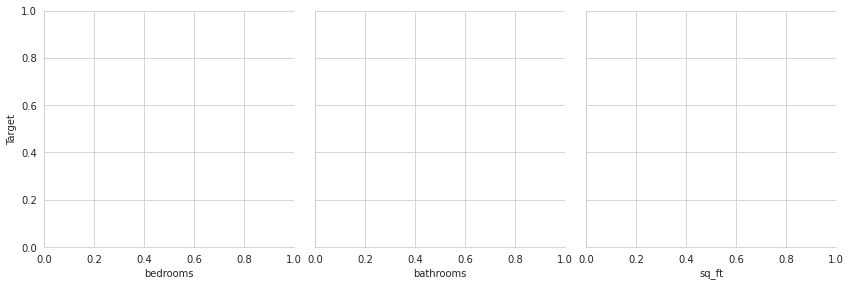

In [17]:
# Using pairplot we'll visualize the data for correlation

#sns.pairplot(df_original, x_vars=['bedrooms', 'postcode','type'],
#plt.figure(figsize=(20,15))
#sns.pairplot(df_original, x_vars=['bedrooms', 'bathrooms','compass','type','Station_Prox','hold_type2','sq_ft','Price','borough'], y_vars='Target', height=4, aspect=4, kind='scatter')
sns.pairplot(df_original, x_vars=['bedrooms', 'bathrooms','sq_ft'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()
sns.pairplot(df_original, x_vars=['Station_Prox','type','hold_type2'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()
sns.pairplot(df_original, x_vars=['borough','compass','Price'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
sns.pairplot(df_original[df_original['bedrooms'] == 2], x_vars=['Station_Prox'], y_vars='Target', size=7, aspect=1, kind='scatter')
plt.show()

In [ ]:
sns.pairplot(df_original[df_original["type"] == "house"], x_vars=['bedrooms', 'compass'],
             y_vars='Target', height=5, aspect=1, kind='scatter')
plt.show()

In [ ]:
df_original.hist(figsize=(12,12))

In [ ]:
df_original.hist(bins=50, figsize=(20,15))

In [ ]:
df_original[(df_original['sq_ft'] != -1) & (df_original['Target'] != -1)].hist(bins=50, figsize=(20,15))

In [ ]:
df_original["postcode"].value_counts()

In [ ]:
df_original["type"].value_counts()

In [ ]:
for each in df_original.columns:

    if each not in ['other_key_info','bullet_points','station_info','long_description']:
        print(each)
        print(df_original[each].value_counts())

In [ ]:
df_original.iloc[:,:-1].shape,df_original.iloc[:,-1].shape,df_original["Target"].shape

In [ ]:
df_original.head(20)

In [ ]:
#df_original.drop("Links")
df = df_original.copy()
#df = df.drop(['Links','version_head','version_indiv','link'], axis=1)
df = df.drop(['Address','Description','Price','postcode'], axis=1)
df = df.drop(['borough','other_key_info','bullet_points','station_info'], axis=1)
df = df.drop(['short_description','long_description','hold_type','size'], axis=1)
df.head(20)

In [ ]:
for column in ['type','compass','hold_type2']:
    df = pd.concat([df,pd.get_dummies(df[column], prefix=column)],axis=1)
    # now drop the original column (you don't need it anymore)
    df.drop([column],axis=1, inplace=True)
df.head(20)

In [ ]:
if False:
    df.dropna(inplace=True)
    df

In [ ]:
X = df.drop(["Target"],axis=1)
y = df["Target"]
X,y

# Exploratory Analysis

In [ ]:
### does this work? it seems slow
#for each in df_original.columns[:2]:
#    x = df_original.plot(kind='scatter',x=each, y="Target")
#    plt.show()
#    #print (each)

In [ ]:
### does this work? it doesn't seem to
#import numpy as np
#for each in df_original.columns:
#    print(each)
#
# x = df_original.plot(kind='scatter',x='bedrooms', y="Target")
# plt.yticks(np.arange(min(x), max(x)+1, 1000))
# plt.show()

In [ ]:
# also not working
# df_original["Target"].describe()
# xx.describe()
# yy.dropna().describe()
# df_original["Target"]

In [ ]:
#subset = df_original[df_original[['Target']].apply(lambda x: x[0].isdigit(), axis=1)]
pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)

#print(subset.head())
subset.describe()
df_original["Target"].value_counts()
df_original["Target"].dtypes
df_original.dtypes

#df_original["Target"] = df_original["Target"].astype("float")
#df_original.dtypes

pd.to_numeric(df_original["Target"], 'coerce').dropna().astype(int)

xx = subset['bedrooms']
yy = subset['Target']

xx,yy
subset['Target'] = pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)
subset['Target'].info()

# Creating a subplot with 2 row and 1 column
fig, (axes3) = plt.subplots(1, 1, figsize=(10,7))

# Plotting first axes object i.e. axes1 and labeling
# its x and y axes
axes3.scatter(xx, yy)
axes3.set_ylabel('y-axis')
axes3.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 1 and of y-axis
# to 0.1 of first axes i.e. axes1.
axes3.xaxis.set_ticks(np.arange(0, 10, 1))
#axes3.yaxis.set_ticks(np.arange(0, 0.5, 0.1))
#axes3.yaxis.set_ticks([0,10])
axes3.yaxis.set_ticks(np.arange(0, 10000000,500000))

plt.show()

In [ ]:
#subset = df_original[df_original[['Target']].apply(lambda x: x[0].isdigit(), axis=1)]
pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)

for x in subset.columns:

    if x not in ['other_key_info','bullet_points','station_info','long_description',
        'Address','Description',
        'borough'
                 ]:
        print(x)
        #x= 'bedrooms'
        y = 'Target'
        xx = subset[x]
        yy = subset[y]

        xx,yy

        # Creating a subplot with 2 row and 1 column
        fig, (axes3) = plt.subplots(1, 1, figsize=(10,7))

        # Plotting first axes object i.e. axes1 and labeling
        # its x and y axes
        axes3.scatter(xx, yy)
        axes3.set_ylabel(y)
        axes3.set_xlabel(x)

        # Setting the interval of ticks of x-axis to 1 and of y-axis
        # to 0.1 of first axes i.e. axes1.
        #axes3.yaxis.set_ticks(np.arange(0, 0.5, 0.1))
        #axes3.yaxis.set_ticks([0,10])
        axes3.yaxis.set_ticks(np.arange(0, 10000000,500000))

        #axes3.xaxis.set_ticks(np.arange(0, 10, 1))
        axes3.xaxis.set_ticks(np.arange(0, len(xx), len(xx)/10))

        plt.show()

In [ ]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')